In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
df_tesla = pdr.get_data_yahoo("TSLA")
print(df_tesla)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2023-08-14  235.699997  240.660004  233.750000  239.759995  239.759995   
2023-08-15  238.729996  240.500000  232.610001  232.960007  232.960007   
2023-08-16  228.020004  233.970001  225.380005  225.600006  225.600006   
2023-08-17  226.059998  226.740005  218.830002  219.220001  219.220001   
2023-08-18  214.119995  217.580002  212.360

### Simple Moving Average

<Axes: xlabel='Date'>

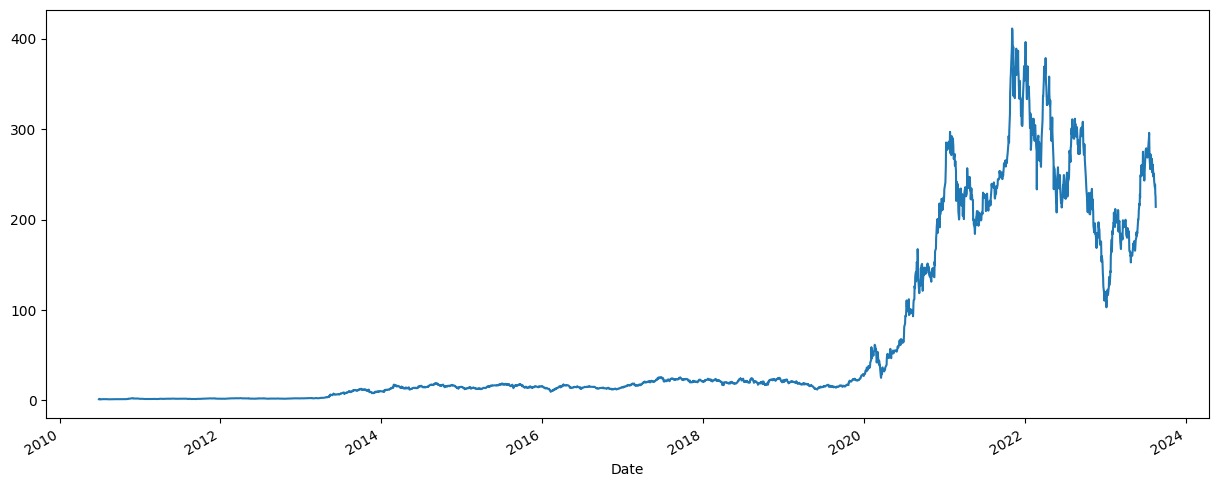

In [3]:
df_tesla['Open'].plot(figsize=(15,6))

In [4]:
df_tesla['Open: 10 days rolling']=df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

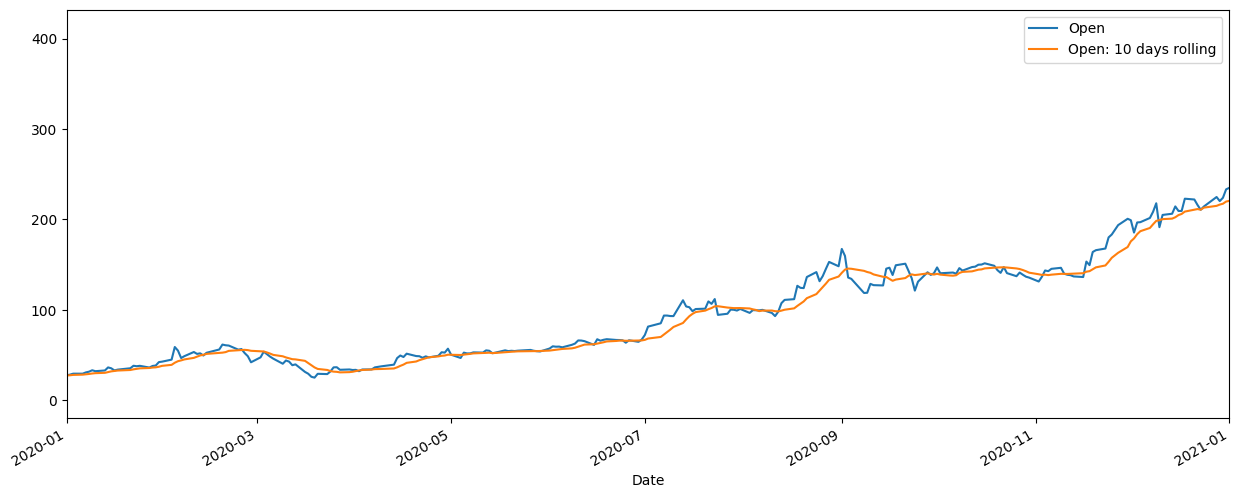

In [5]:
df_tesla[['Open','Open: 10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [6]:
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open: 50 days rolling']=df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='Date'>

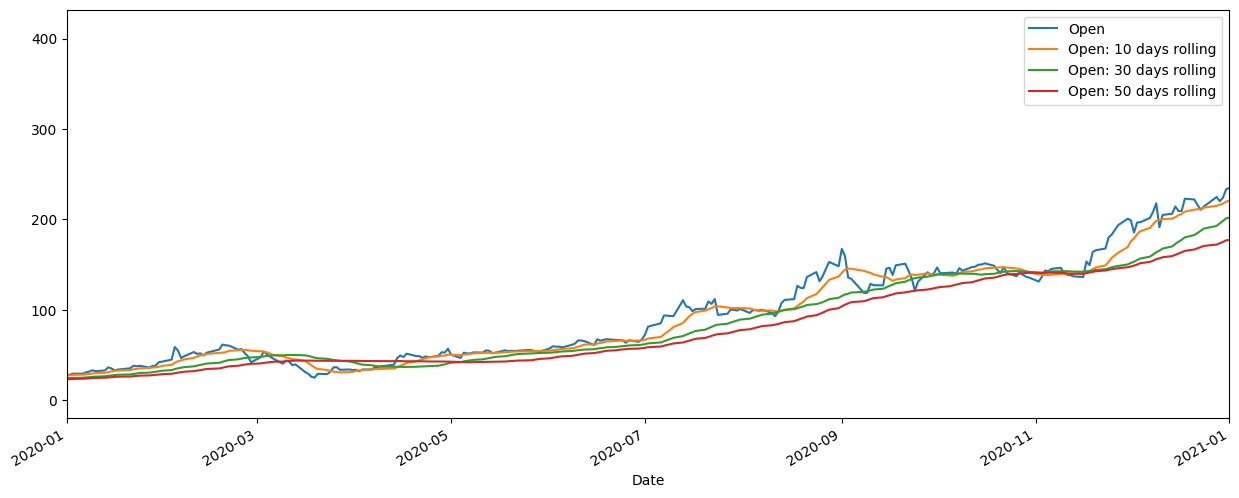

In [7]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

### Cummulative Moving Average 

<Axes: xlabel='Date'>

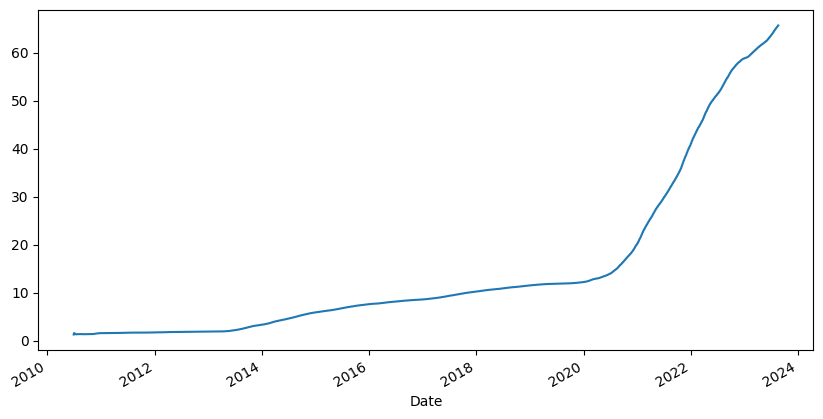

In [8]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [9]:
df_tesla.to_csv("tesla_finance_data.csv",index=False)

### Exponential Weighted Moving Average(EWMA)

In [10]:
## It provides weights to the recent data

In [11]:
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

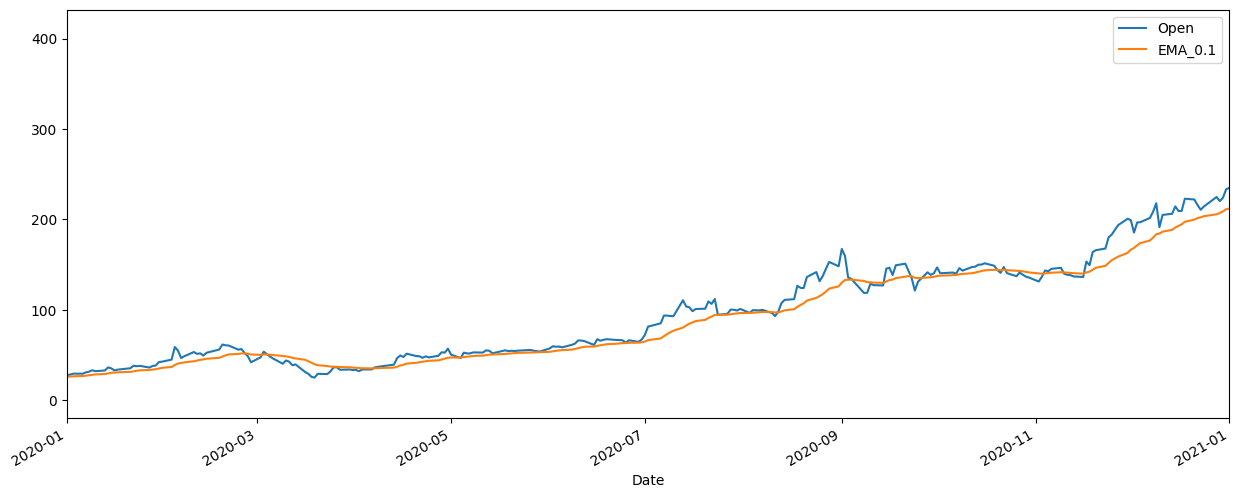

In [12]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [13]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

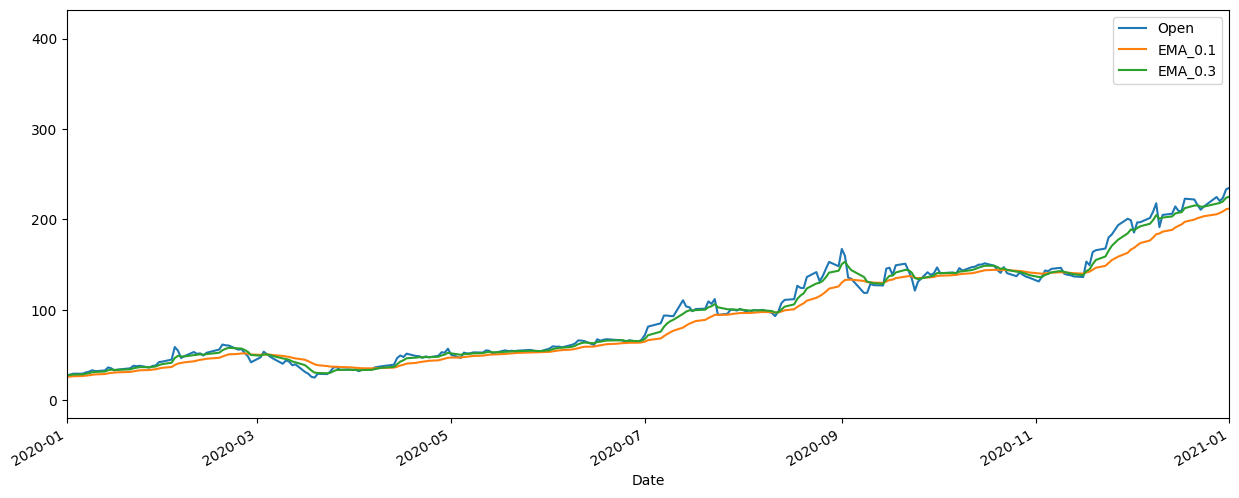

In [14]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [15]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

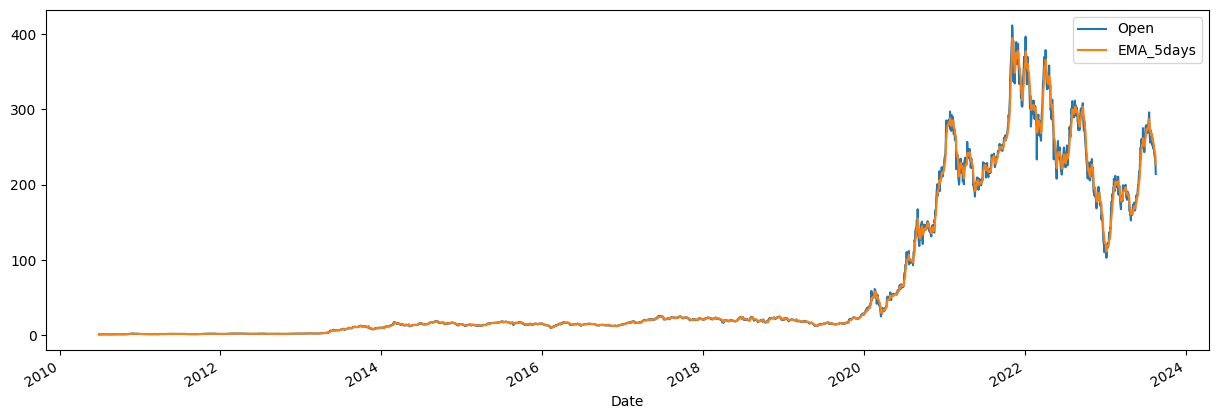

In [16]:
df_tesla[['Open','EMA_5days']].plot(figsize=(15,5))

### Moving Average Model